# HW 9 - Investigating Chaotic systems with python


In [1]:
# Imports
import numpy as np
import scipy as sp
from scipy import integrate
from scipy.spatial import distance #Q2
from scipy.signal import find_peaks #Q3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Excercise 1

Recall the Holling-Tanner Model of an ecological system

*Plants*  
$\dot{x} = x(1-x) - \frac{a_1x}{1+b_1x}y$  

*Herbivores*  
$\dot{y} = \frac{a_1x}{1+b_1x}y - d_1y-\frac{a_2y}{1+b_2y}z$  

*Carnivores*  
$\dot{z} = \frac{a_2y}{1+b_2y}z - d_2z$


Simulate these equations for at least two sets of initial conditions that are less than 1% apart using the following parameters  
`a1 = 5`  
`b1 = 3`  
`a2 = 0.1`  
`b2 = 2`  
`d1 = 0.4`  
`d2 = 0.01`  

Plot the results as both a time series and trajectories. What eventually happens to the trajectories?

In [2]:
def HollingTanner(Y, t, a1, b1, a2, b2, d1, d2):
    x = Y[0]
    y = Y[1]
    z = Y[2]
    
    # Plants
    dxdt = x*(1-x) - ((a1*x)/(1 + b1*x)) * y
    
    # Herbivores
    dydt = ((a1*x)/(1 + b1*x)) * y - d1 * y - ((a2*y)/(1 + b2*y)) * z
    
    # Carnivores
    dzdt = ((a2*y)/(1 + b2*y)) * z - d2 * z
    
    return dxdt, dydt, dzdt

In [3]:
# Parameters
a1 = 5
b1 = 3
a2 = 0.1
b2 = 2
d1 = 0.4
d2 = 0.01

In [4]:
# Initial condition 1
Y0 = np.array([1, 0.1, 8])

In [5]:
t = np.linspace(0, 1000, 10000)

# Solve the ODE
Y = integrate.odeint(HollingTanner, Y0, t, args = (a1, b1, a2, b2, d1, d2))

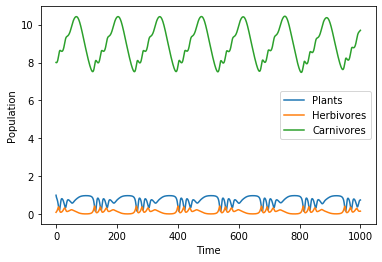

In [6]:
# Plot time series
plt.plot(t, Y)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(("Plants", "Herbivores", "Carnivores"))
plt.show()

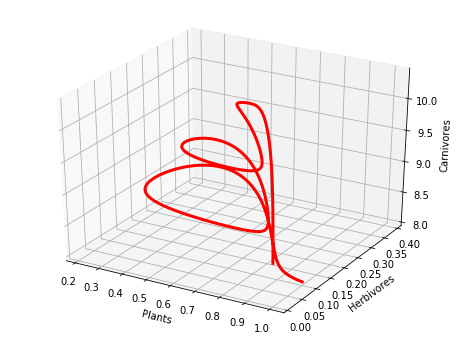

In [7]:
# plot 3D
fig = plt.figure(figsize = (8, 6))

Ntimepoints = 1000

ax = fig.gca(projection = "3d")
plt.plot(Y[0:Ntimepoints, 0], Y[0:Ntimepoints, 1], Y[0:Ntimepoints, 2], color = "Red", linewidth = 3)

ax.set_xlabel("Plants")
ax.set_ylabel("Herbivores")
ax.set_zlabel("Carnivores")

plt.show()

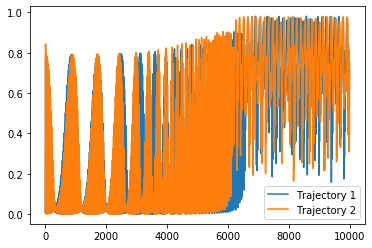

In [8]:
t = np.linspace(0, 10000, 1000)

# Plot trajectories
N_trajectories = 2

x0 = 0.01 * np.random.random((N_trajectories, 3))

x_t = np.asarray([integrate.odeint(HollingTanner, x0i, t, args = (a1, b1, a2, b2, d1, d2))
                  for x0i in x0])

plt.plot(t, x_t[0, :, 0])
plt.plot(t, x_t[1, :, 0])

plt.legend(("Trajectory 1", "Trajectory 2"))
plt.show()

In [9]:
# Initial condition 2
Y0 = np.array([0.99, 0.101, 7.99])

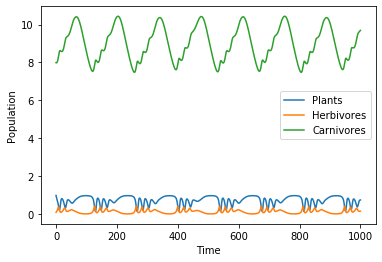

In [10]:
t = np.linspace(0, 1000, 10000)

# Solve the ODE
Y = integrate.odeint(HollingTanner, Y0, t, args = (a1, b1, a2, b2, d1, d2))

# Plot time series
plt.plot(t, Y)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(("Plants", "Herbivores", "Carnivores"))
plt.show()

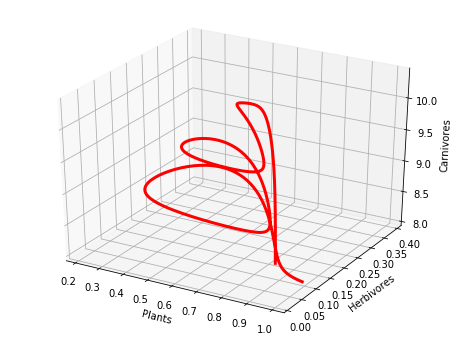

In [11]:
# plot 3D
fig = plt.figure(figsize = (8, 6))

Ntimepoints = 1000

ax = fig.gca(projection = "3d")
plt.plot(Y[0:Ntimepoints, 0], Y[0:Ntimepoints, 1], Y[0:Ntimepoints, 2], color = "Red", linewidth = 3)

ax.set_xlabel("Plants")
ax.set_ylabel("Herbivores")
ax.set_zlabel("Carnivores")

plt.show()

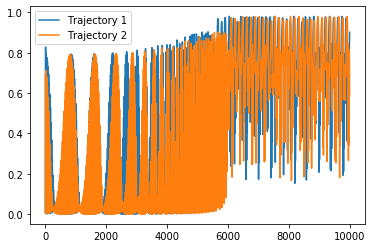

In [12]:
t = np.linspace(0, 10000, 1000)

# Plot trajectories
N_trajectories = 2

x0 = 0.01 * np.random.random((N_trajectories, 3))

x_t = np.asarray([integrate.odeint(HollingTanner, x0i, t, args = (a1, b1, a2, b2, d1, d2))
                  for x0i in x0])

plt.plot(t, x_t[0, :, 0])
plt.plot(t, x_t[1, :, 0])

plt.legend(("Trajectory 1", "Trajectory 2"))
plt.show()

Eventually, the chaotic trajectories stabilize.

## Excercise 2
Recall that the concept of "sensitivity to initial conditions" can be given a precise definition.

Suppose $m_0$ and $n_0$ are two sets of initial conditions for the Holling-Tanner system and $d(m_0,n_0)$ is the distance between those points.

In the Holling-Tanner system $m_0$ and $n_0$ are points in 3-dimensional space, so the distance between them can be calculated using the standard formula for Euclidean distance:

$d(m,n) = \sqrt{(x_m-x_n)^2+(y_m-y_n)^2+(z_m-z_n)^2}$

After time $t$ the points $m_0$ and $n_0$ have been integrated to $m_t$ and $n_t$. Sensitivity dependance says that $d(m_t, n_t)$ grows exponentially with time with different levels of sensitivity being associated with different values of the lyapunov exponentn $\lambda$, such that  

$d(m_t, n_t) = e^{\lambda t}d(m_0,n_0)$  

Approximate the lyapunov exponent for the Holling-Tanner system using the parameters from Excercise 1. Show your work. 

In [13]:
def computeDistance(Y):
    d = np.zeros((1, Y.shape[1]))
    
    for i in np.arange(0, Y.shape[1]):
        d[0,i] = distance.euclidean(Y[0, i, :], Y[1, i, :])
        
    return d.T

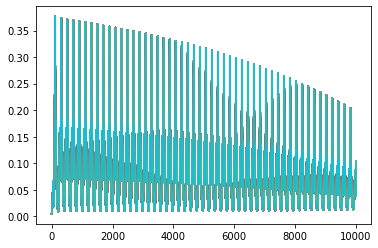

In [14]:
t = np.linspace(0, 1000, 10000)

D = np.zeros((len(t), 100))

for i in np.arange(0, 100):
    Y0 = 0.01 + np.random.random((N_trajectories, 3))
    Y = np.asarray([integrate.odeint(HollingTanner, x0i, t, args = (a1, b1, a2, b2, d1, d2))
                  for x0i in x0])
    
    d = computeDistance(Y)
    
    D[:, i] = d[:, 0]
    
    plt.plot(d)

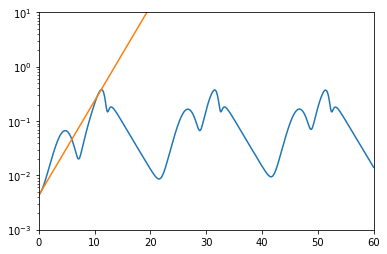

In [15]:
# D(mt, nt)
plt.semilogy(t, np.mean(D, axis = 1))

# e^{lambda t}D(m0, n0)
D0 = np.mean(D[0, :])
lyapunov = 0.4
plt.semilogy(t, D0 * np.exp(lyapunov*t))

plt.xlim(0, 60)
plt.ylim(0.001, 10)

plt.show()

The lyapunov exponent value for Holling-Tanner system using the above parameters is approximately $0.4$.

## Excercise 3

Plot the Lorenz Map of the herbivores in the Holling-Tanner system using the abovementioned parameters.  

What happens at an Nth peak height of ~0.29? What does it represent?



In [16]:
# Simulate again using t 0-100000
Y0 = np.array([1, 0.1, 8])

t = np.linspace(0, 100000, 100000)

# Solve the ODE
Y = integrate.odeint(HollingTanner, Y0, t, args = (a1, b1, a2, b2, d1, d2))

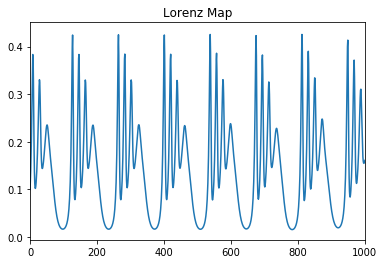

In [17]:
# Lorenz Map
plt.plot(t, Y[:, 1])
plt.title("Lorenz Map")
plt.xlim(0, 1000)
plt.show()

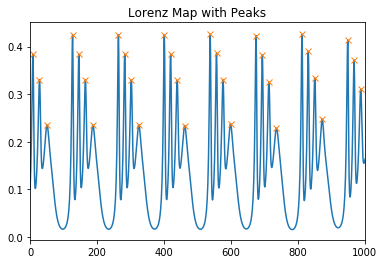

In [18]:
# Peaks
# Ztrace
Ztrace = Y[:, 1]
peaks, _ = find_peaks(Ztrace, height = 0)

# Plot Ztrace & peaks
plt.plot(Ztrace)
plt.plot(peaks, Ztrace[peaks], "x")
plt.title("Lorenz Map with Peaks")
plt.xlim(0, 1000)
plt.show()

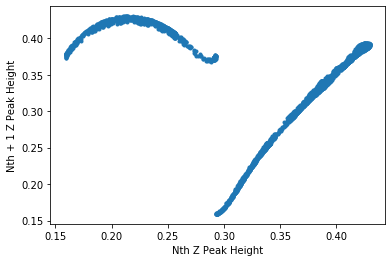

In [19]:
firstPeaks = Ztrace[peaks[:-1]]
secondPeaks = Ztrace[peaks[1:]]

plt.plot(firstPeaks, secondPeaks, ".")

plt.xlabel("Nth Z Peak Height")
plt.ylabel("Nth + 1 Z Peak Height")
plt.show()

At an Nth peak height of ~$0.29$, the system collapses. It represents the lowest peak height in this system.